In [1]:
import pandas as pd
df = pd.read_csv('../Downloads/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# describing my data
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# median of age
import numpy as np
median_Age = np.median(df['age'])
median_Age

39.0

In [7]:
df.shape

(1338, 7)

In [8]:
# checking null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [2]:
# giving unique value
print(f'Age:{df.age.nunique()}')
print(f'Sex: {df.sex.nunique()}')
print(f'Smoker: {df.smoker.unique()}')
print(f'children: {df.children.nunique()}')

Age:47
Sex: 2
Smoker: ['yes' 'no']
children: 6


In [14]:
# datatypes of each attributes
age_col = df.age.dtype
smoker_col = df.smoker.dtype
print("Age datatype = ", age_col)
print("smoke datatype = ", smoker_col)

Age datatype =  int64
smoke datatype =  object


In [24]:
# range std_deviation
# from scipy import stats
max_age = np.max(df['age'])
min_charges = np.min(df['charges'])
std_age = np.std(df['age'])
std_charges = np.std(df['charges'])
var_age = np.var(df['age'])
print(min_charges)
print(max_age)
print(var_age)
print(std_age)
print(std_charges)

1121.8739
64
197.25385198889137
14.04470903895454
12105.484975561605


In [23]:
percentile_charges70 = np.percentile(df['charges'], 80)
print(percentile_charges70)

20260.626406000003


In [26]:
# calculating skewness and kurtosis in dataset
skew_charges = df['charges'].skew()
print(skew_charges)

1.5158796580240388


# thus it is a positively skewed meaning that there are low charges and few high charges

In [27]:
kurtosis_charges = df['charges'].kurt()
print(kurtosis_charges)

1.6062986532967907


<h3 style="color: blue">The above kurtosis we found it is > 0 implying that it has a sharp edge</h3>

<h3 style="color: green">Correlation coefficient in features</h3>

In [7]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

correlation = round(numeric_df.corr(), 3)
correlation

,age,bmi,children,charges
age,1.000,0.109,0.042,0.299
bmi,0.109,1.000,0.013,0.198
children,0.042,0.013,1.000,0.068
charges,0.299,0.198,0.068,1.000


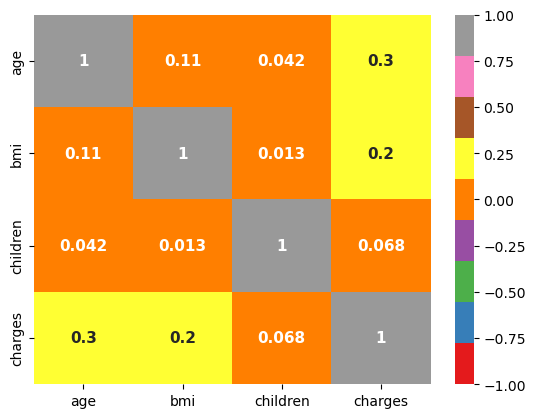

In [22]:
# heatmap
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(correlation, cmap="Set1", annot=True, vmax=1, vmin=-1,  annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.show()

In [11]:
df.charges.corr(df.age)

0.29900819333064765

In [12]:
# p-value
from scipy import stats
corr = stats.pearsonr(df.charges, df.bmi)
corr

PearsonRResult(statistic=0.1983409688336289, pvalue=2.459085535116766e-13)

In [11]:
# regression table to find coefficients and p-value + r-squared
import statsmodels.formula.api as smf
model1 = smf.ols('bmi~age', data=df)
expected = model1.fit()
print(expected.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.15
Date:                Thu, 16 May 2024   Prob (F-statistic):           6.19e-05
Time:                        19:58:33   Log-Likelihood:                -4309.1
No. Observations:                1338   AIC:                             8622.
Df Residuals:                    1336   BIC:                             8633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8039      0.492     58.595      0.0

<h3>Inferences from our <span style="color: purple; text-decoration: underline;">REGRESSION</span> table above:</h3>
<p style="color:blue; text-decoration: underline">R-squared = 0.012</p>
meaning the data points of the variables are not close to the linear line model
<p style="color:blue; text-decoration: underline">Correlation Coefficient = 0.0474</p>
This interpret that there is weak positive correlation between age and bmi features, low potential dependency
<span style="text-decoration: italic;">A correlation coefficient of 0.0474 suggests a weak positive correlation between the age and BMI features. This means that as age increases, BMI tends to increase slightly, but the relationship is weak.</span>
<p style="color:purple; text-decoration: underline">p-value = 0.00</p>
Thus null hypothesis(H0) is rejected and alternative hypothesis(H1) is accepted, hence there is significant relationship between 2 features 

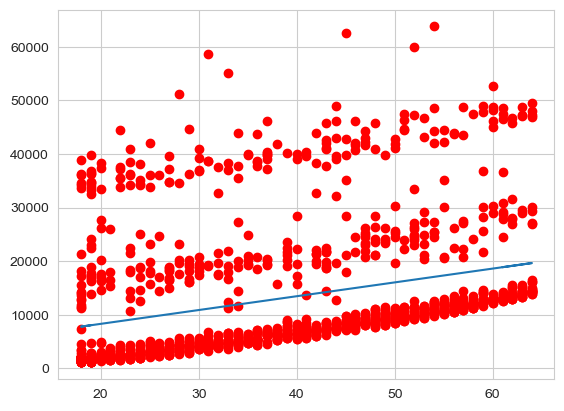

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style("whitegrid")
x = df['age']
y = df['charges']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def model2(x):
    return slope*x + intercept
model3 = list(map(model2, x))
plt.scatter(x, y, color="red")
plt.plot(x, model3)
plt.show()